Methods to apply Regression on Real numbered parameters, using complex coefficients.


To do:  
* Ramdomise parameters used in Random Search Algorithim  
* Create a Complex Manifold mapping Real plane to Complex plane
* Multiple targets vavriables

Promising results with Non-linearly seperable data.
Note:
- Optimise Gradient Descent
- Optimise Activation function (two variables mapping to one, losing information)
- Get circular Data

In [1]:
from linear_regression import \
    ComplexLinearRegression, LinearRegression
import math
import numpy as np
import random
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Get data

In [24]:
X, y = make_regression(
    n_samples = 1000,
    n_features = 2)

# Make none-linear
y = np.abs(y)

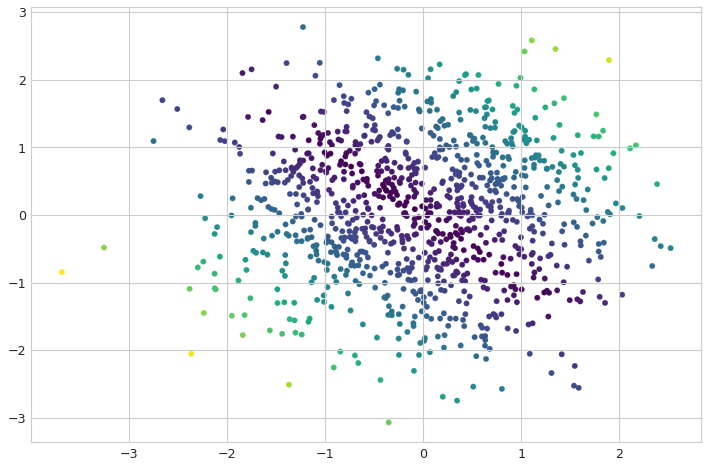

In [25]:
plt.scatter(x = X[:,0], y = X[:,1], c = y)

# Complex Valued Linear Regression

In [67]:
"""
Methods to perform linear regression.

I have a Complex method, and a Real method to compare against.

@author: Dáire Campbell <daireiscool@gmail.com>

Notes:
    - The process is very slow.
        Cannot perform gradient descent, so must perform Random Search Algorithim.
        Is there a stocastic version?
"""
import numpy as np
import random
import tqdm

class ComplexLinearRegression():
    """
    Method to apply linear regression using complex coefficients.
    
    Using a manual Random Search Algorithim.
    
    """
    def __init__(
        self, 
        alpha = 1e-5,
        epoch = 1,
        tol = 1e-3,
        random_state = 0,
        n_iter = 10000,
        verbose = False,
        stochastic = False,
        p = 0.1
    ):
        """
        Initialising function.
        
        ::param alpha: (float) default = 1e-5
        ::param epoch: (int) default = 1
        ::param tol: (float) default = 1e-3
        ::random_state: (int) default = 0
        ::param n_iter: (int) default 10000
        ::param verbose: (boolean), default = False
        """
        self.alpha = alpha
        self.epoch = epoch
        self.tol = tol
        random.seed(random_state)
        self.loss = []
        self.weights_history = []
        self.n_iter = n_iter
        self.verbose = verbose
        self.weights = []
        self.stochastic = stochastic
        self.p = p

    def _print(self, *args):
        """
        Function to print, if verbose = True
        """
        if self.verbose:
            print(*args)


    def complex_weights(self, n):
        """
        Function get initial weights
        
        ::param n: (int)
        ::return: (numpy array[complex])
        """
        return np.array([
            random.randint(-10, 10) +
            random.randint(-10, 10)*1j
            for i in list(range(n))])

    def error(self, y, y_pred):
        """
        Function to get error between y and prediction.
        
        ::param y: (numpy array)
        ::param y_pred: (numpy array)
        """
        return sum((y*1 - y_pred)**2)/len(y)

    def random_search_algorithim(self, X, y):
        """
        Random Search Algorithim for complex numbers polynomial.
        
        ::param X: (numpy ndarray)
        ::param y: (numpy array)
        ::param weights: (numpy array)
        """
        weights = self.weights
        
        dim = list(range(X.shape[1]))
        random.shuffle(dim)
        
        for i in dim:
            a = np.zeros((X.shape[1],)); 
            a[i] = 1
            
            temp_weights = weights + a*(0 + 0 * 1j)
            loss = self.error(y, self._predict(X, temp_weights))
            self._print(f"Initial Loss: {loss}")

            
            weights_alpha = [(j[0]+j[1]*1j) for j in 
                np.transpose([np.tile([0,1,-1], 3), np.repeat([0,1,-1], 3)])]
            
            for w in weights_alpha:
                if self.error(y, self._predict(X, temp_weights+a*w * self.alpha)) < loss:
                    temp_weights += w
                    self.weights_history += [temp_weights]
                    loss = self.error(y, self._predict(X, temp_weights))
                    self._print(f"Updated Loss: {loss}")
            
            self.loss += [loss]
            self.weights = temp_weights

    def fit(self, X, y):
        """
        Function to fit data to a complex linear function.
        
        ::param X: (numpy ndarray)
        ::param y: (numpy array)
        ::return: (complex)
        """
        X = np.c_[X, np.ones(len(X))]
        self.weights = self.complex_weights(X.shape[1])
        self._print("Initial weights: ", self.weights)
        
        for i in tqdm.tqdm(range(self.n_iter)):
            self.random_search_algorithim(X, y)

    def _predict(self, X, weights):
        """
        Function to fit data to a complex linear function.
        
        ::param X: (numpy ndarray)
        ::param training: (boolean)
        ::param weights: (numpy array)
        ::return: (complex)
        """
        return np.abs(X.dot(weights))

    def predict(self, X):
        """
        Function to fit data to a complex linear function.
        
        ::param X: (numpy ndarray)
        ::param training: (boolean)
        ::param weights: (numpy array)
        ::return: (complex)
        """
        X = np.c_[X, np.ones(len(X))]
        weights = self.weights
        return np.abs(X.dot(weights))


In [68]:
clr = ComplexLinearRegression(alpha = 0.005, n_iter=10000)

clr.fit(X, y)

100%|██████████| 10000/10000 [01:16<00:00, 130.82it/s]


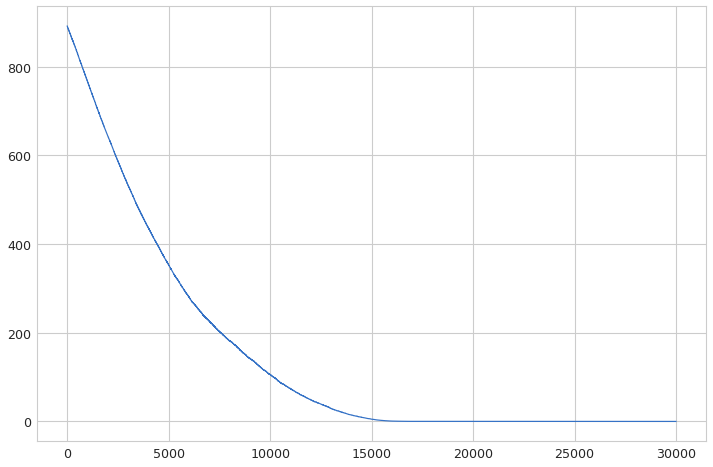

In [59]:
# Plotting loss
plt.plot(clr.loss)

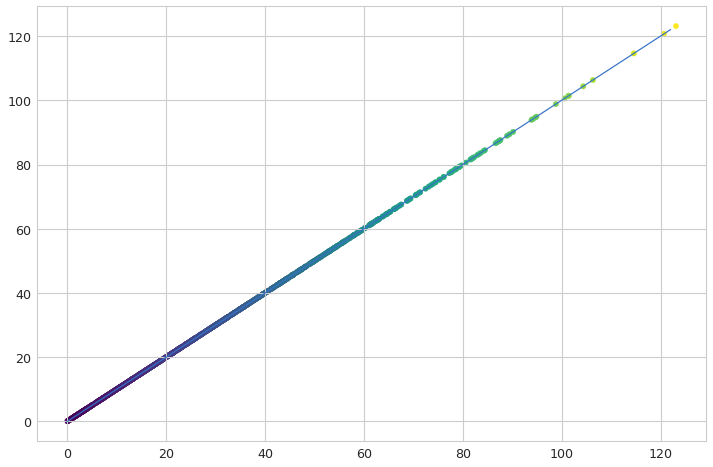

In [28]:
# Comparing predicted and expected results
plt.scatter(x = y, y = clr.predict(X), c = clr.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

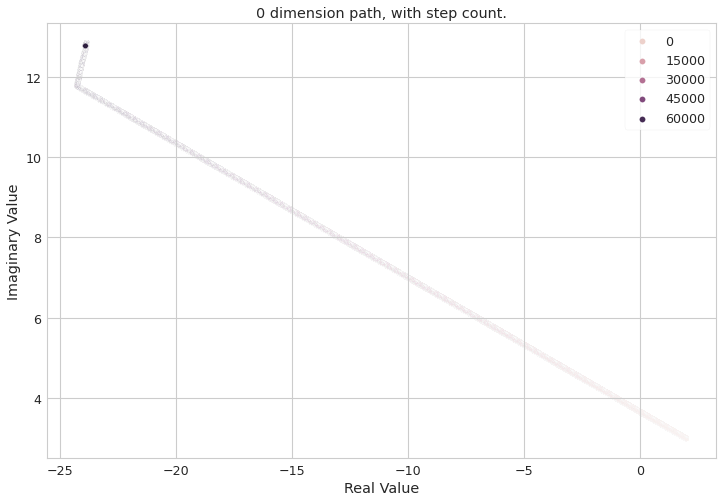

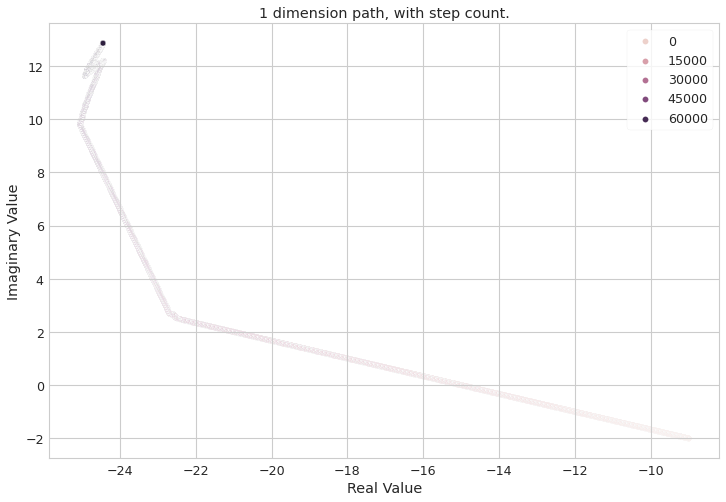

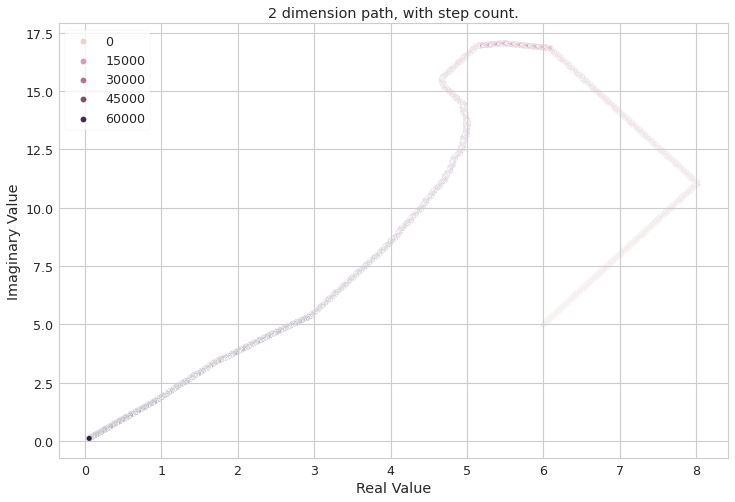

In [29]:
# Plot gradient path of variables
history = clr.weights_history
for j in range(history[0].shape[0]):
    
    fig = sns.scatterplot(x =[i[j].real for i in history], y =[i[j].imag for i in history], hue = range(len(history)))
    plt.xlabel("Real Value")
    plt.ylabel("Imaginary Value")
    plt.title(f"{j} dimension path, with step count.")

    plt.show()

In [30]:
print(f"MSE: {sum((y - clr.predict(X))**2)/len(y)}")

MSE: 1.732914444649941e-05


# Compare to Real valued Linear Regression

In [31]:
lr = LinearRegression(alpha = 0.005, n_iter=10000)

lr.fit(X, y)

100%|██████████| 10000/10000 [07:55<00:00, 21.05it/s]


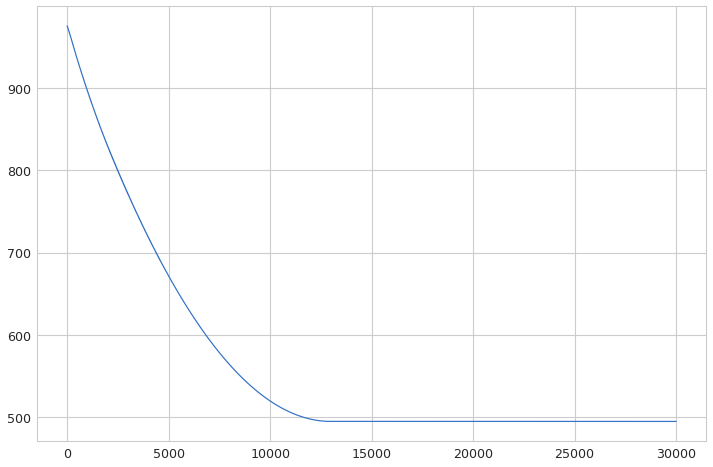

In [32]:
# Plotting loss
plt.plot(lr.loss)

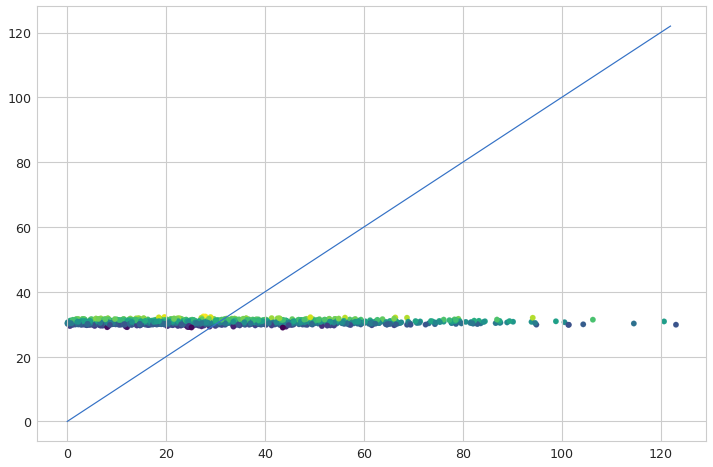

In [33]:
# Comparing predicted and expected results
plt.scatter(x = y, y = lr.predict(X), c = lr.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

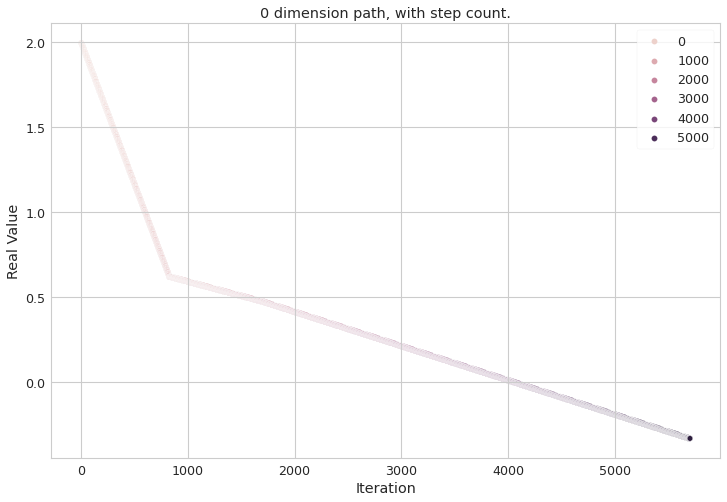

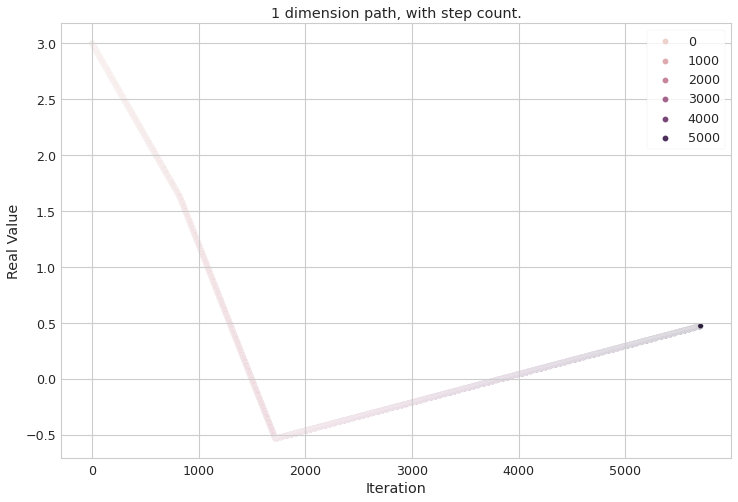

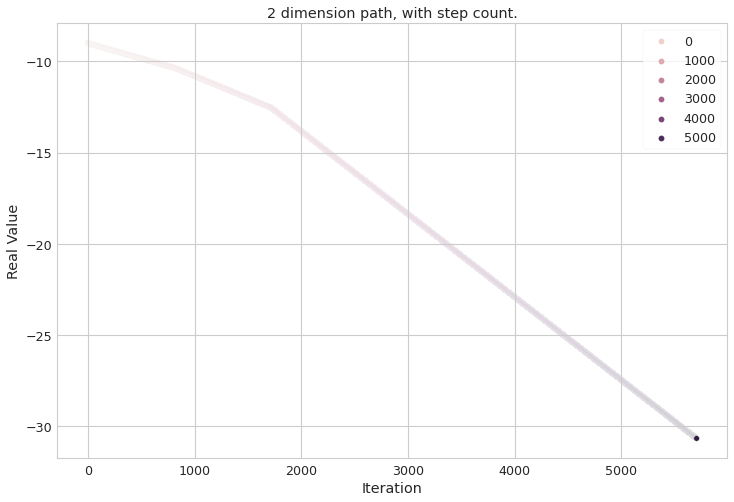

In [34]:
# Plot gradient path of variables
history = lr.weights_history
for j in range(history[0].shape[0]):
    
    fig = sns.scatterplot(x =range(len(history)), y =[i[j] for i in history], hue = range(len(history)))
    plt.xlabel("Iteration")
    plt.ylabel("Real Value")
    plt.title(f"{j} dimension path, with step count.")
    
    plt.show()

In [35]:
print(f"MSE: {sum((y - lr.predict(X))**2)/len(y)}")

MSE: 494.523701782495


# Compare to Real valued Sklearn Linear Regression

MSE: 494.52369848358086


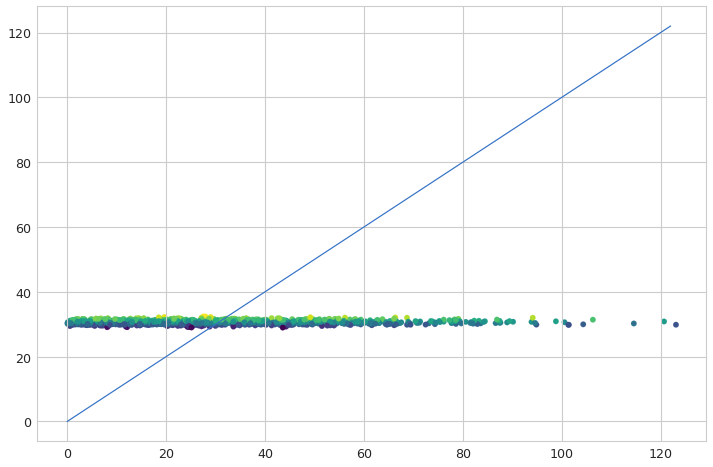

In [36]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
lin_r = SklearnLinearRegression()

lin_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = lin_r.predict(X), c = lin_r.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

print(f"MSE: {sum((y - lin_r.predict(X))**2)/len(y)}")

# Compare to non-linear Regression

### SGDRegressor

MSE: 494.57359163498205


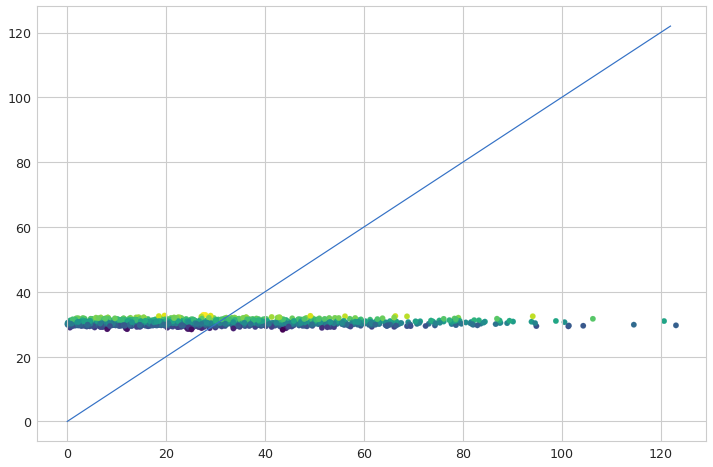

In [37]:
from sklearn.linear_model import SGDRegressor
sgd_r = SGDRegressor()

sgd_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = sgd_r.predict(X), c = sgd_r.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

print(f"MSE: {sum((y - sgd_r.predict(X))**2)/len(y)}")

### MLPRegressor

MSE: 35.96718416529707


/home/daire/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


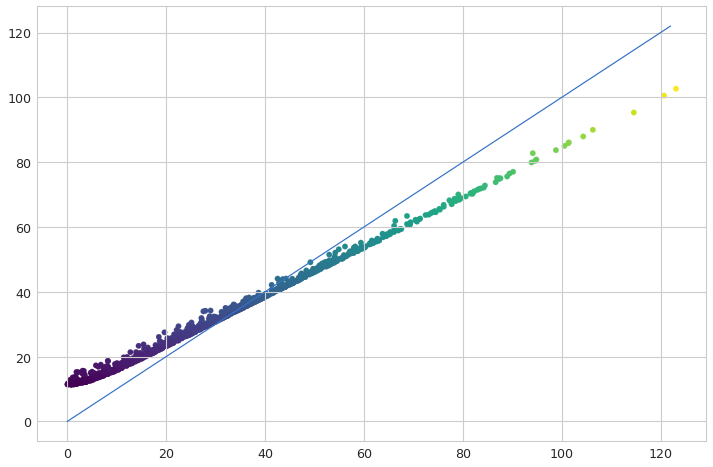

In [38]:
from sklearn.neural_network import MLPRegressor
mlp_r = MLPRegressor()

mlp_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = mlp_r.predict(X), c = mlp_r.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

print(f"MSE: {sum((y - mlp_r.predict(X))**2)/len(y)}")

### SVM

MSE: 39.82309006810447


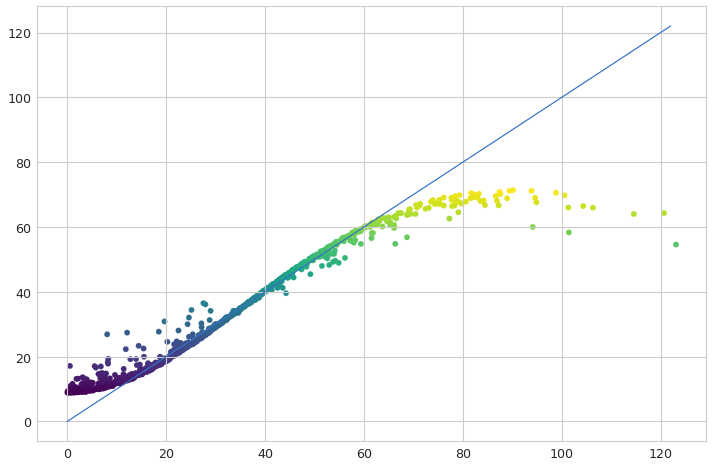

In [39]:
from sklearn.svm import SVR
svm_r = SVR()

svm_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = svm_r.predict(X), c = svm_r.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

print(f"MSE: {sum((y - svm_r.predict(X))**2)/len(y)}")

### RandomForestRegressor

MSE: 1.350264151814546


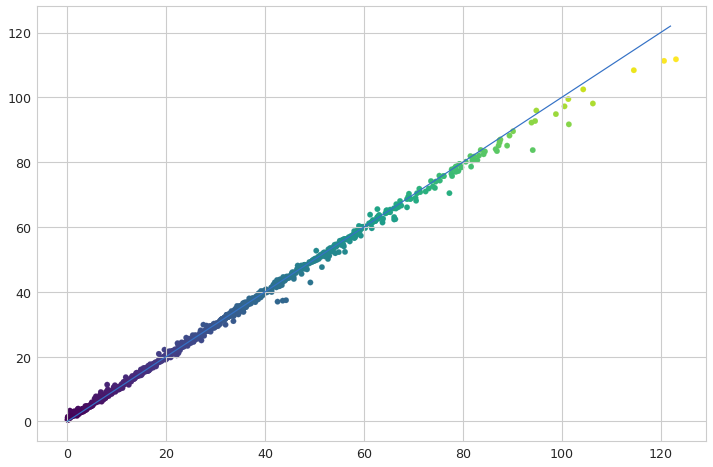

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf_r = RandomForestRegressor()

rf_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = rf_r.predict(X), c = rf_r.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

print(f"MSE: {sum((y - rf_r.predict(X))**2)/len(y)}")

[0j, (1+0j), (-1+0j), 1j, (1+1j), (-1+1j), -1j, (1-1j), (-1-1j)]

In [66]:
np.transpose([np.tile([0,1,-1], 3), np.repeat([0,1,-1], 3)])

array([[ 0,  0],
       [ 1,  0],
       [-1,  0],
       [ 0,  1],
       [ 1,  1],
       [-1,  1],
       [ 0, -1],
       [ 1, -1],
       [-1, -1]])